<a href="https://colab.research.google.com/github/dani-s-h007/bird-model/blob/main/birdmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from fastai.vision.all import *
import os
from pathlib import Path
import requests
from PIL import Image
from io import BytesIO

# Set dataset path
path = Path('/content/birds')

# Step 1: Resize and verify images
for cat in ['bird', 'not bird']:
    resize_images(path/cat, max_size=128)
    failed = verify_images(get_image_files(path/cat))
    failed.map(Path.unlink)
    print(f"{cat}: {len(get_image_files(path/cat))} images remaining after cleaning")

# Step 2: Diagnostic - List filenames
print("\nImages in 'bird' folder:")
bird_image_files = get_image_files(path/'bird')
print([f.name for f in bird_image_files])

print("\nImages in 'not bird' folder:")
not_bird_image_files = get_image_files(path/'not bird')
print([f.name for f in not_bird_image_files])

# Step 3: Try to open one image from each
try:
    if bird_image_files:
        img = PILImage.create(bird_image_files[0])
        print(f"\nOpened bird image: {bird_image_files[0].name}")
except Exception as e:
    print(f" Failed to open bird image: {e}")

try:
    if not_bird_image_files:
        img = PILImage.create(not_bird_image_files[0])
        print(f"Opened not bird image: {not_bird_image_files[0].name}")
except Exception as e:
    print(f"Failed to open not bird image: {e}")

# Step 4: Label function
def label_func(fname):
    return 'bird' if 'bird' in Path(fname).parent.name else 'not bird'

# Step 5: Create DataLoaders
all_image_files = get_image_files(path)

dls = ImageDataLoaders.from_name_func(
    path,
    all_image_files,
    valid_pct=0.2,
    seed=42,
    label_func=label_func,
    item_tfms=Resize(128),
    bs=8
)

dls.num_workers = 0

# Step 6: Show batch
dls.show_batch(max_n=9)

# Step 7: Train model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

# Step 8: Export model
learn.export('bird_classifier.pkl')

# Step 9: Load model (inference mode)
learn_inf = load_learner('bird_classifier.pkl')

# Step 10: Test on image from URL
def predict_from_url(url):
    print(f"\n🔗 Fetching image from: {url}")
    try:
        response = requests.get(url)
        img = PILImage.create(BytesIO(response.content))
        pred_class, pred_idx, probs = learn_inf.predict(img)
        print(f"Prediction: {pred_class} ({probs[pred_idx]:.2%})")
        img.show(title=f"{pred_class} ({probs[pred_idx]:.2%})")
    except Exception as e:
        print(f"Error loading or predicting from URL: {e}")

# Example bird or not bird image
test_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/American_Robin.jpg/640px-American_Robin.jpg"
predict_from_url(test_image_url)


bird: 20 images remaining after cleaning
not bird: 20 images remaining after cleaning

Images in 'bird' folder:
['premium_photo-1687191004345-7b515dcb00bb.jpg', 'photo-1518992028580-6d57bd80f2dd.jpg', 'photo-1470619549108-b85c56fe5be8.jpg', 'photo-1486365227551-f3f90034a57c.jpg', 'photo-1480044965905-02098d419e96.jpg', 'photo-1445820200644-69f87d946277.jpg', 'photo-1520808663317-647b476a81b9.jpg', 'photo-1452570053594-1b985d6ea890.jpg', 'premium_photo-1724864863815-1469c8b74711.jpg', 'photo-1490718720478-364a07a997cd.jpg', 'photo-1551085254-e96b210db58a.jpg', 'photo-1550853024-fae8cd4be47f.jpg', 'photo-1470116073782-48ae2ccd8ffd.jpg', 'premium_photo-1666777247125-c8915ef41287.jpg', 'premium_photo-1669279284400-bcdd8dbdbd55.jpg', 'photo-1606567595334-d39972c85dbe.jpg', 'photo-1497206365907-f5e630693df0.jpg', 'photo-1591055749071-927e6ddffc82.jpg', 'premium_photo-1675714692342-01dfd2e6b6b5.jpg', 'photo-1552728089-57bdde30beb3.jpg']

Images in 'not bird' folder:
['pexels-esther-234072-746

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:06
1,0.000000,0.000000,0.000000,00:05
2,0.000000,0.000000,0.000000,00:07



🔗 Fetching image from: https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/American_Robin.jpg/640px-American_Robin.jpg
Error loading or predicting from URL: cannot identify image file <_io.BytesIO object at 0x7fb220f73010>


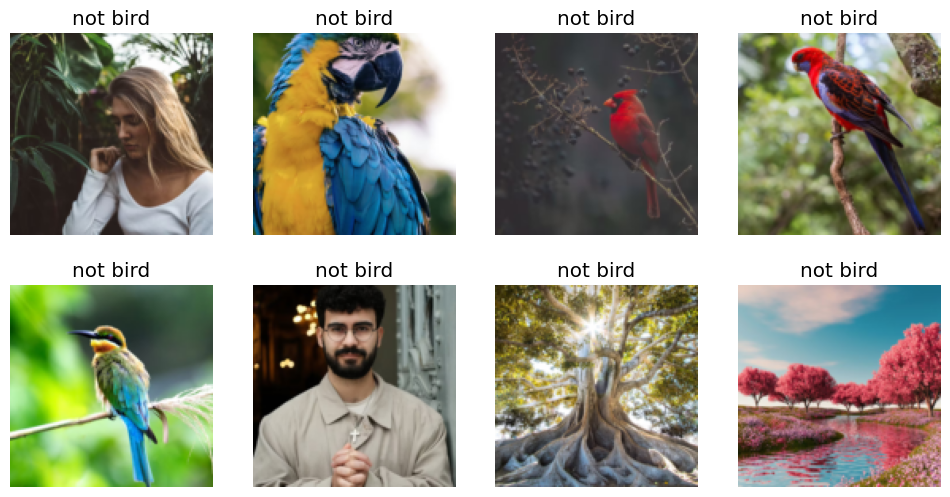

In [ ]:
from fastai.vision.all import *
import os
from pathlib import Path
import requests
from io import BytesIO

# Step 1: Set up dataset path
path = Path('/content/birds')  # Make sure your dataset is organized as /birds/bird and /birds/not bird

# Step 2: Resize and verify images
for cat in ['bird', 'not bird']:
    resize_images(path/cat, max_size=128)
    failed = verify_images(get_image_files(path/cat))
    failed.map(Path.unlink)
    print(f"{cat}: {len(get_image_files(path/cat))} images remaining after cleaning")

# Step 3: Show available files
print("\nImages in 'bird' folder:")
bird_image_files = get_image_files(path/'bird')
print([f.name for f in bird_image_files])

print("\nImages in 'not bird' folder:")
not_bird_image_files = get_image_files(path/'not bird')
print([f.name for f in not_bird_image_files])

# Step 4: Test image reading
try:
    if bird_image_files:
        img = PILImage.create(bird_image_files[0])
        print(f"\n Successfully opened a bird image: {bird_image_files[0].name}")
except Exception as e:
    print(f"Failed to open a bird image: {e}")

try:
    if not_bird_image_files:
        img = PILImage.create(not_bird_image_files[0])
        print(f"Successfully opened a not bird image: {not_bird_image_files[0].name}")
except Exception as e:
    print(f"Failed to open a not bird image: {e}")

# Step 5: Define label function
def label_func(fname):
    return 'bird' if 'bird' in Path(fname).parent.name else 'not bird'

# Step 6: Prepare DataLoaders
all_image_files = get_image_files(path)

dls = ImageDataLoaders.from_name_func(
    path,
    all_image_files,
    valid_pct=0.2,
    seed=42,
    label_func=label_func,
    item_tfms=Resize(128),
    bs=8
)

dls.num_workers = 0  # Avoid multiprocessing issues

# Step 7: Show batch
dls.show_batch(max_n=9)

# Step 8: Train model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

# Step 9: Export model (optional)
learn.export('bird_classifier.pkl')  # Optional if you want to reuse later

# Step 10: Predict from online image URL
def predict_from_url(url):
    print(f"\n🔗 Fetching image from: {url}")
    try:
        response = requests.get(url)
        img = PILImage.create(BytesIO(response.content))
        pred_class, pred_idx, probs = learn.predict(img)
        print(f"rediction: {pred_class} ({probs[pred_idx]:.2%})")
        img.show(title=f"{pred_class} ({probs[pred_idx]:.2%})")
    except Exception as e:
        print(f"Error loading or predicting from URL: {e}")

# Step 11: Run test
test_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/American_Robin.jpg/640px-American_Robin.jpg"
predict_from_url(test_image_url)


In [ ]:
!git config --global user.email "shanusathar@gmail.com"
!git config --global user.name "dani-s-h007"


fatal: pathspec 'birdmodel.ipynb' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	birds/
	gdrive/
	pexels-esther-234072-746496.jpg
	pexels-goumbik-317377.jpg
	pexels-goumbik-942772.jpg
	pexels-lilartsy-1458716.jpg
	pexels-tirachard-kumtanom-112571-733853.jpg
	photo-1421789665209-c9b2a435e3dc.jpg
	photo-1433086966358-54859d0ed716.jpg
	photo-1438761681033-6461ffad8d80.jpg
	photo-1445053023192-8d45cb66099d.jpg
	photo-1445820200644-69f87d946277.jpg
	photo-1452570053594-1b985d6ea890.jpg
	photo-1465146344425-f00d5f5c8f07.jpg
	photo-1470116073782-48ae2ccd8ffd.jpg
	photo-1470619549108-b85c56fe5be8.jpg
	photo-1472396961693-142e6e269027.jpg
	photo-1480044965905-02098d419e96.jpg
	photo-1486365227551-f3f90034a57c.jpg
	photo-1490718720478-364a07a997cd.jpg
	photo-1497206365907-f5e630693df0.jpg
	photo-1518495973542-4542c06a5843.jpg
	photo-1518992028580-6d57bd80f2dd.jpg
	photo-1520808663317-647b476a8

In [ ]:
!git status


On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	.gitignore
	birds/
	gdrive/
	photo-1445053023192-8d45cb66099d.jpg
	photo-1445820200644-69f87d946277.jpg
	photo-1465146344425-f00d5f5c8f07.jpg
	photo-1470619549108-b85c56fe5be8.jpg
	photo-1472396961693-142e6e269027.jpg
	photo-1486365227551-f3f90034a57c.jpg
	photo-1490718720478-364a07a997cd.jpg
	photo-1518495973542-4542c06a5843.jpg
	photo-1518992028580-6d57bd80f2dd.jpg
	photo-1520808663317-647b476a81b9.jpg
	photo-1521566652839-697aa473761a.jpg
	photo-1550853024-fae8cd4be47f.jpg
	photo-1551085254-e96b210db58a.jpg
	photo-1552728089-57bdde30beb3.jpg
	photo-1591055749071-927e6ddffc82.jpg
	photo-1606567595334-d39972c85dbe.jpg
	premium_photo-1669279284400-bcdd8dbdbd55.jpg
	premium_photo-1673292293042-cafd9c8a3ab3.jpg
	premium_photo-1675714692342-01dfd2e6b6b5.jpg
	premium_photo-1675827055694-010aef2cf08f.jpg
	premium_photo-1678197937465-bdbc4ed95815.jpg
	premium_photo-1